In [0]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader

import torchvision.transforms as transforms
import torchvision.datasets as datasets

import matplotlib.pyplot as plt

# no batchnorm here

class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 3, 3, 1, 1)
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(3, 6, 3, 1, 1)
        self.pool2 = nn.MaxPool2d(2)
        
        self.conv_trans1 = nn.ConvTranspose2d(6, 3, 4, 2, 1)
        self.conv_trans2 = nn.ConvTranspose2d(3, 1, 4, 2, 1)
        
    def forward(self, x):
        x = F.relu(self.pool1(self.conv1(x)))
        x = F.relu(self.pool2(self.conv2(x)))        
        x = F.relu(self.conv_trans1(x))
        x = self.conv_trans2(x)
        return x

In [2]:
dataset = datasets.MNIST(
    root='PATH', download=True,
    transform=transforms.ToTensor()
)


0it [00:00, ?it/s]

9920512it [00:02, 3642602.65it/s]                             


Extracting PATH/MNIST/raw/train-images-idx3-ubyte.gz


0it [00:00, ?it/s]

32768it [00:00, 58306.32it/s]                           
0it [00:00, ?it/s]

Extracting PATH/MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:01, 957317.16it/s]                             
0it [00:00, ?it/s]

Extracting PATH/MNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 21982.21it/s]            

Extracting PATH/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [0]:
loader = DataLoader(
    dataset,
    num_workers=2,
    batch_size=80,
    shuffle=True
)

In [0]:
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook

In [5]:
model = MyModel()
loss_fn = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Visualize feature maps
activation = {}

model.conv1.register_forward_hook(get_activation('conv1'))

Register hook then make one forward pass to collect the weight

In [0]:
from IPython.core.debugger import set_trace

Visualize layers and predictions. See how the weights evolve

In [0]:
# loss function on output and data so kind of like reconstruction

In [0]:
def normalize_output(img):
    img = img - img.min()
    img = img / img.max()
    return img

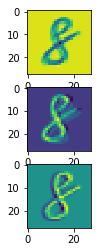

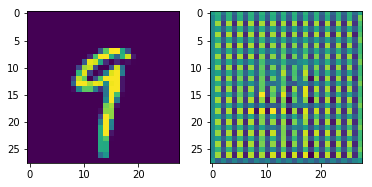

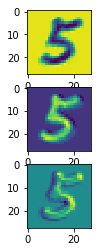

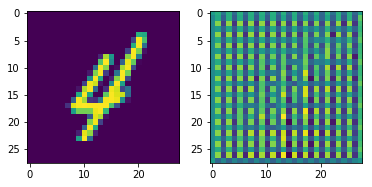

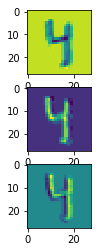

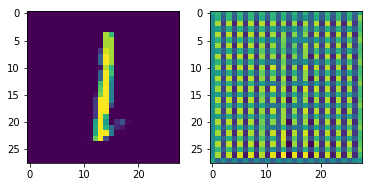

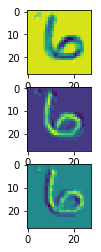

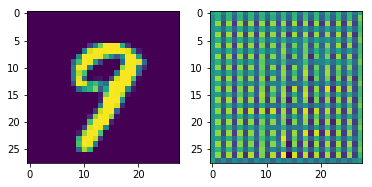

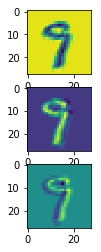

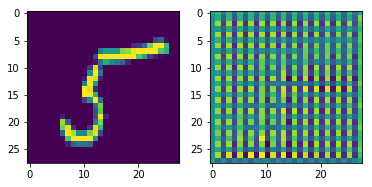

In [9]:
epochs = 5
for epoch in range(epochs):
    for batch_idx, (data, target) in enumerate(loader):
        # set_trace()
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, data)
        loss.backward()
        optimizer.step()

        # print('-'*50)

        act = activation['conv1'].squeeze()[0]        
        fig, axarr = plt.subplots(act.size(0))
        for idx in range(act.size(0)):
            axarr[idx].imshow(act[idx])


        if batch_idx == 0:

          idx = 5
          pred = normalize_output(output[idx, 0])
          img = data[idx, 0]

          fig, axarr = plt.subplots(1, 2)
          axarr[0].imshow(img.detach().numpy())
          axarr[1].imshow(pred.detach().numpy())
          break

        # print('Epoch {}, Batch idx {}, loss {}'.format(
        #     epoch, batch_idx, loss.item()))
        #  if batch_idx == 0: break

In [0]:
# eventually create a function to plot
# but no need to optimize, have fun with the process

In [0]:
data, _ = dataset[50000]
data.unsqueeze_(0)
output = model(data)